In [1]:
import numpy as np
import pandas as pd

pd.set_option('max_columns', 100)

In [2]:
from sklearn.preprocessing import Imputer

In [3]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]

### Reading .csv file

In [4]:
raw = pd.read_csv('training_data.csv')
raw.head()

,compound_number,X,loss_216.208,loss_436.087,fragment_219.17,loss_14.896,loss_1026.581,loss_311.293,loss_381.095,loss_1175.592,loss_329.184,fragment_986.602,loss_781.47,loss_180.105,fragment_335.721,fragment_180.067,loss_1058.402,fragment_449.171,loss_1615.773,loss_178.194,loss_130.91,fragment_236.103,loss_906.289,loss_47.879,fragment_1568.772,fragment_396.736,fragment_1000.449,loss_1540.675,loss_504.128,loss_347.671,fragment_349.187,loss_455.133,fragment_756.149,loss_1351.715,fragment_363.049,loss_602.447,loss_318.19,loss_49.758,loss_191.186,loss_1274.632,loss_332.144,loss_77.043,loss_1085.602,fragment_1712.778,loss_538.231,loss_1194.518,fragment_594.439,loss_818.23,loss_587.124,loss_1029.526,...,fragment_119.021,fragment_435.128,loss_467.274,fragment_1821.827,MQScore,Compound_Name,X2_MethylbutanoicAcid,AcacicAcid,Acetylglucosamine,Alanine,AminoAcid,Anthocyanidin,CaffeicAcid,pCoumaricAcid,CinnamicAcid,Cyclic_Monoterpene,Deoxyfuranose,DihydroFlavone,Dihydroflavonol,DiHydroxyPiperidineCarboxylicAcid,Echinocystic_LactoneBridge,OleanolicAcid,Flavan3ol,Flavonol,Flavone,Furanose,GallicAcid,Glucosamine,GlutamicAcid,Glutamine,HexopyranuronicAcid,HydroxyPiperidineCarboxylicAcid,Imidazole,L_Dopa,Leucine,Lysine,MetaMethoxyCinnamicAcid,MethoxyFerulicAcid,FerulicAcid,Monoterpene,Oleanolic_LactoneBridge,Phenolic,PipecolicAcid,Pyranose,Triterpene,FattyAcid,Tryptophan,Tyramine,Tyrosine,Xanthonoid
0,1,Inga_compound_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.493507,dihydromyricetin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,15,Inga_compound_15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,Di_Hydro_Myricetin_Gallate,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,18,Inga_compound_18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.697186,"NCGC00168909-02!(2R,3R)-2-(3,4-dihydroxyphenyl...",0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,20,Inga_compound_20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.361187,AcacicAcid_DiHydroxyPiperidinicAcid_FerulicAci...,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0
4,24,Inga_compound_24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.449019,Coumaryl_EchinocysticAcid_Pyranoside_Ribopyran...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0


In [5]:
raw

,compound_number,X,loss_216.208,loss_436.087,fragment_219.17,loss_14.896,loss_1026.581,loss_311.293,loss_381.095,loss_1175.592,loss_329.184,fragment_986.602,loss_781.47,loss_180.105,fragment_335.721,fragment_180.067,loss_1058.402,fragment_449.171,loss_1615.773,loss_178.194,loss_130.91,fragment_236.103,loss_906.289,loss_47.879,fragment_1568.772,fragment_396.736,fragment_1000.449,loss_1540.675,loss_504.128,loss_347.671,fragment_349.187,loss_455.133,fragment_756.149,loss_1351.715,fragment_363.049,loss_602.447,loss_318.19,loss_49.758,loss_191.186,loss_1274.632,loss_332.144,loss_77.043,loss_1085.602,fragment_1712.778,loss_538.231,loss_1194.518,fragment_594.439,loss_818.23,loss_587.124,loss_1029.526,...,fragment_119.021,fragment_435.128,loss_467.274,fragment_1821.827,MQScore,Compound_Name,X2_MethylbutanoicAcid,AcacicAcid,Acetylglucosamine,Alanine,AminoAcid,Anthocyanidin,CaffeicAcid,pCoumaricAcid,CinnamicAcid,Cyclic_Monoterpene,Deoxyfuranose,DihydroFlavone,Dihydroflavonol,DiHydroxyPiperidineCarboxylicAcid,Echinocystic_LactoneBridge,OleanolicAcid,Flavan3ol,Flavonol,Flavone,Furanose,GallicAcid,Glucosamine,GlutamicAcid,Glutamine,HexopyranuronicAcid,HydroxyPiperidineCarboxylicAcid,Imidazole,L_Dopa,Leucine,Lysine,MetaMethoxyCinnamicAcid,MethoxyFerulicAcid,FerulicAcid,Monoterpene,Oleanolic_LactoneBridge,Phenolic,PipecolicAcid,Pyranose,Triterpene,FattyAcid,Tryptophan,Tyramine,Tyrosine,Xanthonoid
0,1,Inga_compound_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.493507,dihydromyricetin,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,15,Inga_compound_15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,Di_Hydro_Myricetin_Gallate,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,18,Inga_compound_18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.697186,"NCGC00168909-02!(2R,3R)-2-(3,4-dihydroxyphenyl...",0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,20,Inga_compound_20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.361187,AcacicAcid_DiHydroxyPiperidinicAcid_FerulicAci...,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0
4,24,Inga_compound_24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.449019,Coumaryl_EchinocysticAcid_Pyranoside_Ribopyran...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0
5,25,Inga_compound_25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,Di_Hydro_Quercetin_Pentose,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,26,Inga_compound_26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.590790,"1,4-Di-O-galloylquinic acid|1,4-digalloylquini...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7,27,Inga_compound_27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.493036,"11-oxomogroside II E|11-oxomogroside IIE|3,24-...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,29,Inga_compound_29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.270784,"(S)-5,7,3',5'-tetrahydroxyflavanone-7-O-(6""-ga...",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
9,32,Inga_compound_32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,"Gallocatechin_Deoxyhexose_Cinna

### Compound Information

Compound Information like **name** and **id** will not be used.

In [7]:
compound_info = raw[['compound_number', 'X', 'Compound_Name']]
compound_info.head()

,compound_number,X,Compound_Name
0,1,Inga_compound_1,dihydromyricetin
1,15,Inga_compound_15,Di_Hydro_Myricetin_Gallate
2,18,Inga_compound_18,"NCGC00168909-02!(2R,3R)-2-(3,4-dihydroxyphenyl..."
3,20,Inga_compound_20,AcacicAcid_DiHydroxyPiperidinicAcid_FerulicAci...
4,24,Inga_compound_24,Coumaryl_EchinocysticAcid_Pyranoside_Ribopyran...


In [8]:
# np.where(raw.columns=='MQScore')[0][0]

### Features

There are 23,403 binary features.

In [9]:
feature = raw.iloc[:,2:23405]
feature.head()

,loss_216.208,loss_436.087,fragment_219.17,loss_14.896,loss_1026.581,loss_311.293,loss_381.095,loss_1175.592,loss_329.184,fragment_986.602,loss_781.47,loss_180.105,fragment_335.721,fragment_180.067,loss_1058.402,fragment_449.171,loss_1615.773,loss_178.194,loss_130.91,fragment_236.103,loss_906.289,loss_47.879,fragment_1568.772,fragment_396.736,fragment_1000.449,loss_1540.675,loss_504.128,loss_347.671,fragment_349.187,loss_455.133,fragment_756.149,loss_1351.715,fragment_363.049,loss_602.447,loss_318.19,loss_49.758,loss_191.186,loss_1274.632,loss_332.144,loss_77.043,loss_1085.602,fragment_1712.778,loss_538.231,loss_1194.518,fragment_594.439,loss_818.23,loss_587.124,loss_1029.526,loss_744.445,loss_1021.311,...,fragment_575.166,fragment_144.046,fragment_601.183,fragment_215.083,fragment_158.12,fragment_533.169,fragment_819.388,fragment_328.057,loss_12.01,loss_1600.8,loss_264.089,loss_1145.978,fragment_603.412,fragment_596.446,fragment_560.147,loss_268.089,loss_515.218,loss_1494.776,fragment_1263.606,loss_198.14,loss_705.145,loss_1054.563,loss_367.338,loss_139.143,loss_750.435,loss_825.37,loss_1085.383,loss_1054.695,loss_926.427,loss_483.116,loss_10.782,loss_1464.865,loss_6.671,loss_40.088,loss_641.41,loss_118.083,loss_302.121,fragment_794.867,loss_819.496,loss_703.436,loss_58.402,loss_511.955,loss_18.041,loss_103.017,loss_836.337,fragment_756.853,fragment_119.021,fragment_435.128,loss_467.274,fragment_1821.827
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Confidence Score

In [10]:
confidence = raw.iloc[:,23405]
confidence.head()

0    0.493507
1         NaN
2    0.697186
3    0.361187
4    0.449019
Name: MQScore, dtype: float64

Half of the records have the confidence value **missing**. Impute them with the **mean** of confidence value over all the records.

In [11]:
confidence.isnull().sum()/confidence.count()

0.5008818342151675

In [12]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputed = imp.fit_transform(confidence.values.reshape(-1,1))
newconfidence = pd.Series(imputed[:,0], name='MQScore')
newconfidence.head()

0    0.493507
1    0.491853
2    0.697186
3    0.361187
4    0.449019
Name: MQScore, dtype: float64

### Labels

Some of the labels have value **missing**. Treat them as 0.

In [13]:
label = raw.iloc[:,23407:23451]
label.head()

,X2_MethylbutanoicAcid,AcacicAcid,Acetylglucosamine,Alanine,AminoAcid,Anthocyanidin,CaffeicAcid,pCoumaricAcid,CinnamicAcid,Cyclic_Monoterpene,Deoxyfuranose,DihydroFlavone,Dihydroflavonol,DiHydroxyPiperidineCarboxylicAcid,Echinocystic_LactoneBridge,OleanolicAcid,Flavan3ol,Flavonol,Flavone,Furanose,GallicAcid,Glucosamine,GlutamicAcid,Glutamine,HexopyranuronicAcid,HydroxyPiperidineCarboxylicAcid,Imidazole,L_Dopa,Leucine,Lysine,MetaMethoxyCinnamicAcid,MethoxyFerulicAcid,FerulicAcid,Monoterpene,Oleanolic_LactoneBridge,Phenolic,PipecolicAcid,Pyranose,Triterpene,FattyAcid,Tryptophan,Tyramine,Tyrosine,Xanthonoid
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0


In [14]:
newlabel = label.fillna(0)
newlabel.head()

,X2_MethylbutanoicAcid,AcacicAcid,Acetylglucosamine,Alanine,AminoAcid,Anthocyanidin,CaffeicAcid,pCoumaricAcid,CinnamicAcid,Cyclic_Monoterpene,Deoxyfuranose,DihydroFlavone,Dihydroflavonol,DiHydroxyPiperidineCarboxylicAcid,Echinocystic_LactoneBridge,OleanolicAcid,Flavan3ol,Flavonol,Flavone,Furanose,GallicAcid,Glucosamine,GlutamicAcid,Glutamine,HexopyranuronicAcid,HydroxyPiperidineCarboxylicAcid,Imidazole,L_Dopa,Leucine,Lysine,MetaMethoxyCinnamicAcid,MethoxyFerulicAcid,FerulicAcid,Monoterpene,Oleanolic_LactoneBridge,Phenolic,PipecolicAcid,Pyranose,Triterpene,FattyAcid,Tryptophan,Tyramine,Tyrosine,Xanthonoid
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0


Overview of the **distributions** of labels.

There are 44 labels. Some of them are very **common** while some others are very **rare**.

In [68]:
n_ones = newlabel.sum()
n_records = newlabel.shape[0]
n_labels = newlabel.shape[1]

In [69]:
for i in range(n_labels):
    print('{0:35s} {1:3d} / {2:3d}'.format(n_ones.index[i], int(n_ones[i]), n_records))

X2_MethylbutanoicAcid                88 / 851
AcacicAcid                            9 / 851
Acetylglucosamine                     7 / 851
Alanine                              15 / 851
AminoAcid                            15 / 851
Anthocyanidin                         3 / 851
CaffeicAcid                          24 / 851
pCoumaricAcid                       107 / 851
CinnamicAcid                         68 / 851
Cyclic_Monoterpene                    5 / 851
Deoxyfuranose                        75 / 851
DihydroFlavone                       84 / 851
Dihydroflavonol                      69 / 851
DiHydroxyPiperidineCarboxylicAcid     2 / 851
Echinocystic_LactoneBridge            2 / 851
OleanolicAcid                        53 / 851
Flavan3ol                           419 / 851
Flavonol                            202 / 851
Flavone                              21 / 851
Furanose                             75 / 851
GallicAcid                          327 / 851
Glucosamine                       

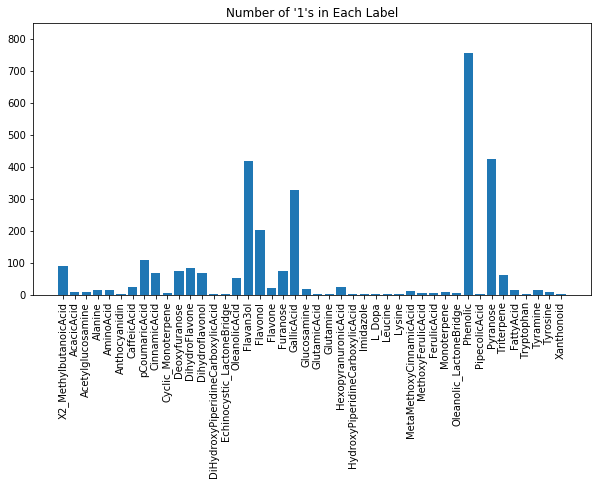

In [70]:
plt.bar(np.arange(n_labels),n_ones)
plt.xticks(np.arange(n_labels), n_ones.index, rotation='vertical')
plt.ylim([0,n_records])
plt.title('Number of \'1\'s in Each Label')
plt.show()

There are 851 compound records. Numbers of labels of compounds have an approximately **normal distribution**.

In [73]:
dist = newlabel.sum(axis=1)

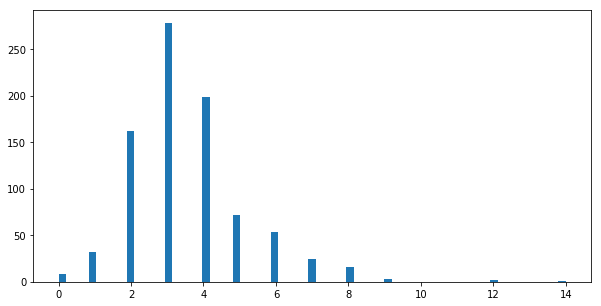

In [86]:
plt.hist(dist, 'auto')
plt.show()

### Merge the cleaned data and export

In [15]:
cleaned = pd.concat([feature, newlabel, newconfidence], axis=1)
cleaned.head()

In [17]:
cleaned.to_csv('training_cleaned.csv', index=None)